In [1]:
# needs version >= 1.5 for full functionality
import tequila as tq 

In [2]:
#Initialize molecule
import tequila as tq
geomstring="N 0.0 0.0 0.0\nN 0.0 0.0 1.09"
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVTZ")
print(molecule)

<class 'tequila.quantumchemistry.psi4_interface.QuantumChemistryPsi4'>
Qubit Encoding
JordanWigner

Parameters
basis_set       : cc-pVTZ         
geometry        : N 0.0 0.0 0.0
N 0.0 0.0 1.09 
description     :                 
multiplicity    : 1               
charge          : 0               
name            : n2              
frozen_core     : True            
n_qubits        : 116             
reference state : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Basis

IntegralManager:
ActiveSpace:
Active Space Data:
active_orbitals : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 

In [3]:
#Molecular Orbitals and Point Groups
molecule.orbitals[3]

OrbitalData(irrep='B3U', idx_irrep=0, idx_total=5, idx=3, energy=-0.6153381625092442, occ=None, pair=None)

In [4]:
#The full Hamiltonian is too large. So, let's set the active space.
#Setting the Active Space
import tequila as tq
import numpy
active_orbitals = {"AG":[2,3], "B1G":[0,1,2], "AU":[0]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVTZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 551 terms
-94.0670-0.6390Z(0)-0.1125Y(0)Z(1)Y(2)-0.1125X(0)Z(1)X(2)-0.6390Z(1)-0.1125Y(1)Z(2)Y(3)-0.1125X(1)Z(2)X(3)-0.8260Z(2)-0.8260Z(3)-1.2349Z(4)-0.0629Y(4)Z(5)Z(6)Z(7)Y(8)-0.0629X(4)Z(5)Z(6)Z(7)X(8)-0.0230Y(4)Z(5)Z(6)Z(7)Z(8)Z(9)Y(10)-0.0230X(4)Z(5)Z(6)Z(7)Z(8)Z(9)X(10)-1.2349Z(5)-0.0629Y(5)Z(6)Z(7)Z(8)Y(9)-0.0629X(5)Z(6)Z(7)Z(8)X(9)-0.0230Y(5)Z(6)Z(7)Z(8)Z(9)Z(10)Y(11)-0.0230X(5)Z(6)Z(7)Z(8)Z(9)Z(10)X(11)-1.4362Z(6)-1.4362Z(7)-2.7017Z(8)+0.0155Y(8)Z(9)Y(10)+0.0155X(8)Z(9)X(10)-2.7017Z(9)+0.0155Y(9)Z(10)Y(11)+0.0155X(9)Z(10)X(11)-3.1765Z(10)-3.1765Z(11)+0.1396Z(0)Z(1)+0.0189Y(0)Y(2)+0.0189X(0)X(2)+0.0189Z(0)Y(1)Z(2)Y(3)+0.0189Z(0)X(1)Z(2)X(3)+0.0087Y(0)X(1)X(2)Y(3)-0.0087Y(0)Y(1)X(2)X(3)-0.0087X(0)X(1)Y(2)Y(3)+0.0087X(0)Y(1)Y(2)X(3)+0.0021Y(0)X(1)X(4)Y(5)-0.0021Y(0)Y(1)X(4)X(5)-0.0021X(0)X(1)Y(4)Y(5)+0.0021X(0)Y(1)Y(4)X(5)-0.0019Y(0)X(1)X(5)Z(6)Z(7)Y(8)-0.0019Y(0)Y(1)Y(5)Z(6)Z(7)Y(8)-0.0019X(0)X(1)X(5)Z(6)Z(7)X(8)-0.0019X(0)Y(1)Y(5)Z(6)Z(7)X(8)+0.0016Y(0)X(1)X(5)Z(

[-108.9855929  -108.42434985 -108.42434985 ...  -70.1138341   -70.1138341
  -67.10222365]
lowest energy =  -108.98559290066548


In [5]:
import tequila as tq
threshold = 1.e-6
active = {"AG":[2,3], "B1G":[0,1,2], "AU":[0]}
molecule = tq.quantumchemistry.Molecule(geometry=geomstring, basis_set='cc-pVTZ', active_orbitals=active)
H = molecule.make_hamiltonian()

U = molecule.make_upccgsd_ansatz(name="2-UpCCGD")

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# compute reference energies
mp2 = molecule.compute_energy("mp2")
cisd = molecule.compute_energy("detci", options={"detci__ex_level": 2})
fci = molecule.compute_energy("fci")

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

print("VQE : {:+2.8}f".format(result.energy))
print("MP2 : {:+2.8}f".format(mp2))
print("CISD: {:+2.8}f".format(cisd))
print("FCI : {:+2.8}f".format(fci))

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 60 expectationvalues

active variables : 30

E=-108.98479913  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, (((0, 5),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D', (None, 0)): 0.0, (((1, 5),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((2, 4),), 'D', (None, 0)): 0.0, (((2, 5),), 'D', (None, 0)): 0.0, (((3, 4),), 'D', (None, 0)): 0.0, (((3, 5),), 'D', (None, 0)): 0.0, (((4, 5),), 'D', (None, 0)): 0.0, (((0, 1),), 'D', (None, 1)): 0.0, (((

E=-108.98553788  angles= {(((0, 1),), 'D', (None, 0)): -0.017448544886304432, (((0, 2),), 'D', (None, 0)): -0.0032303249103511453, (((0, 3),), 'D', (None, 0)): -0.00404120212363458, (((0, 4),), 'D', (None, 0)): -0.0017141554004222867, (((0, 5),), 'D', (None, 0)): -0.001596726577862981, (((1, 2),), 'D', (None, 0)): -5.5485453414901885e-06, (((1, 3),), 'D', (None, 0)): -1.3772321859788856e-05, (((1, 4),), 'D', (None, 0)): -3.1333258572783376e-05, (((1, 5),), 'D', (None, 0)): -2.1795793709174845e-05, (((2, 3),), 'D', (None, 0)): -2.055944129574666e-06, (((2, 4),), 'D', (None, 0)): -5.523507257876106e-06, (((2, 5),), 'D', (None, 0)): -5.300386186388782e-06, (((3, 4),), 'D', (None, 0)): -7.158247328090206e-06, (((3, 5),), 'D', (None, 0)): -4.879182127028213e-06, (((4, 5),), 'D', (None, 0)): -1.2135360108535325e-06, (((0, 1),), 'D', (None, 1)): -0.0174479255992572, (((0, 2),), 'D', (None, 1)): -0.0032311422803862518, (((0, 3),), 'D', (None, 1)): -0.004040582836587346, (((0, 4),), 'D', (None,

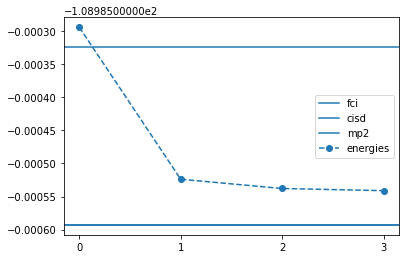

In [6]:
result.history.plot("energies", baselines={"fci":fci, "cisd": cisd, "mp2":mp2}, filename="nitrogen_result_bfgs")